In [523]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype
from datetime import date
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings("ignore")

In [453]:
calendar = pd.read_csv('calendar.csv', parse_dates=['date'])

listing = pd.read_csv('listings.csv', parse_dates=['host_since', 'last_scraped', 'first_review', 'last_review'])
reviews = pd.read_csv('reviews.csv' ,parse_dates=['date'])

calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,50408806,2021-07-17,f,$150.00,$150.00,3.0,45.0
1,50408806,2021-07-18,f,$150.00,$150.00,3.0,45.0
2,50408806,2021-07-19,t,$150.00,$150.00,3.0,45.0
3,50408806,2021-07-20,t,$150.00,$150.00,3.0,45.0
4,50408806,2021-07-21,t,$150.00,$150.00,3.0,45.0


In [454]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10595,https://www.airbnb.com/rooms/10595,20210715154418,2021-07-17,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/f7e19a44-5afe...,37177,https://www.airbnb.com/users/show/37177,...,4.86,4.52,4.69,00000957568,t,6,6,0,0,0.39
1,10990,https://www.airbnb.com/rooms/10990,20210715154418,2021-07-17,Athens Quality Apartments - Deluxe Apartment,Athens Quality Apartments - Deluxe apartment i...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/8645179/c1728...,37177,https://www.airbnb.com/users/show/37177,...,4.92,4.83,4.81,00001070920,t,6,6,0,0,0.70
2,10993,https://www.airbnb.com/rooms/10993,20210715154418,2021-07-17,Athens Quality Apartments - Studio,The Studio is an <br />-excellent located <br ...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/107309527/848...,37177,https://www.airbnb.com/users/show/37177,...,4.97,4.84,4.83,00000957080,t,6,6,0,0,0.91
3,10995,https://www.airbnb.com/rooms/10995,20210715154418,2021-07-17,"AQA-No2 1-bedroom, smart tv, fiber connection,","AQA No2 is 1-bedroom apartment (47m2), on the ...",Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/6a565613-aaa3...,37177,https://www.airbnb.com/users/show/37177,...,4.87,4.77,4.77,00000957422,t,6,6,0,0,0.35
4,27262,https://www.airbnb.com/rooms/27262,20210715154418,2021-07-17,"54m2, 1-br, cable tv, wi-fi, metro",Big 1-bedroom apartment that can accommodate 4...,NaN,https://a0.muscache.com/pictures/8651803/4b82b...,37177,https://www.airbnb.com/users/show/37177,...,5.00,4.69,4.63,00000957579,t,6,6,0,0,0.25


In [455]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,10595,271535,2011-05-20,189305,Pamela,"The apartment was wonderful, fully equiped, be..."
1,10595,1994237,2012-08-15,289831,Andrey,Emmanouil was an excellent host. He provided u...
2,10595,4678609,2013-05-20,2635427,Ahmet,"Manos is a very good host, he is kind and help..."
3,10595,12502994,2014-05-04,2422327,Hema,"Our stay in Emmanouil home was comfortable, qu..."
4,10595,19482948,2014-09-13,6737784,Mariana,Fantastic accommodation very well located to v...


In [456]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3518603 entries, 0 to 3518602
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       object        
 3   price           object        
 4   adjusted_price  object        
 5   minimum_nights  float64       
 6   maximum_nights  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 187.9+ MB


In [457]:
calendar.describe()

,listing_id,minimum_nights,maximum_nights
count,3.518603e+06,3.518602e+06,3.518602e+06
mean,3.065809e+07,4.680980e+00,9.043400e+02
std,1.257638e+07,2.332626e+01,4.212577e+02
min,1.059500e+04,1.000000e+00,1.000000e+00
25%,2.199435e+07,1.000000e+00,1.125000e+03
50%,3.198553e+07,2.000000e+00,1.125000e+03
75%,4.062948e+07,2.000000e+00,1.125000e+03
max,5.103696e+07,1.000000e+03,4.444000e+03


In [458]:
calendar.isnull().sum()

listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    1
maximum_nights    1
dtype: int64

In [459]:
calendar=calendar.dropna()

In [460]:
calendar.isnull().sum()

listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64

In [461]:
# Step 1: data cleaning for calendar.csv
# 1_1 Remove the dollar price on the price column; if the value is a NaN, 
# fill that value with 0, and change the datatype of price to float.
calendar['price'].replace('\$|,', '', regex=True, inplace=True)
calendar['price'].fillna(0, inplace=True)
calendar['price'] = calendar['price'].astype('float')

In [462]:
# 1_2 Extract the year, month, and date, day_name from the date columns
calendar['year'] = calendar['date'].dt.year
calendar['month'] = calendar['date'].dt.month
calendar['day'] = calendar['date'].dt.day
calendar['day_name'] = calendar['date'].dt.day_name()

In [463]:
# 1_3 Change the way of presenting the boolean value; 1 if the value is 't'; 0 if 'f'; ignore the case.
calendar['available'].replace({'t|T': 1, 'f|F': 0}, regex=True, inplace=True)

In [464]:
# Groupby by month sum
calendar_df_month_sum = calendar.groupby(['month']).sum()
calendar_df_month_sum.drop(['listing_id'],axis=1,inplace=True)
calendar_df_month_sum.reset_index(inplace=True)
calendar_df_month_sum

,month,available,price,minimum_nights,maximum_nights,year,day
0,1,195018,66197352.0,1401175.0,270351381.0,604254480,4781440
1,2,167232,62046511.0,1263736.0,244178722.0,545778240,3913840
2,3,186902,68586400.0,1393781.0,270360007.0,604254480,4781440
3,4,171104,73289100.0,1350152.0,261736592.0,584762400,4482600
4,5,170854,78451107.0,1390031.0,270536660.0,604254480,4781440
5,6,166107,77735098.0,1344249.0,261755865.0,584762400,4482600
6,7,128242,54338656.0,1486112.0,270248915.0,604107252,4781471
7,8,144169,27861648.0,1420113.0,269706011.0,603955640,4781440
8,9,186914,26642323.0,1347163.0,261266839.0,584473200,4482600
9,10,211713,29926168.0,1374227.0,270311509.0,603955640,4781440


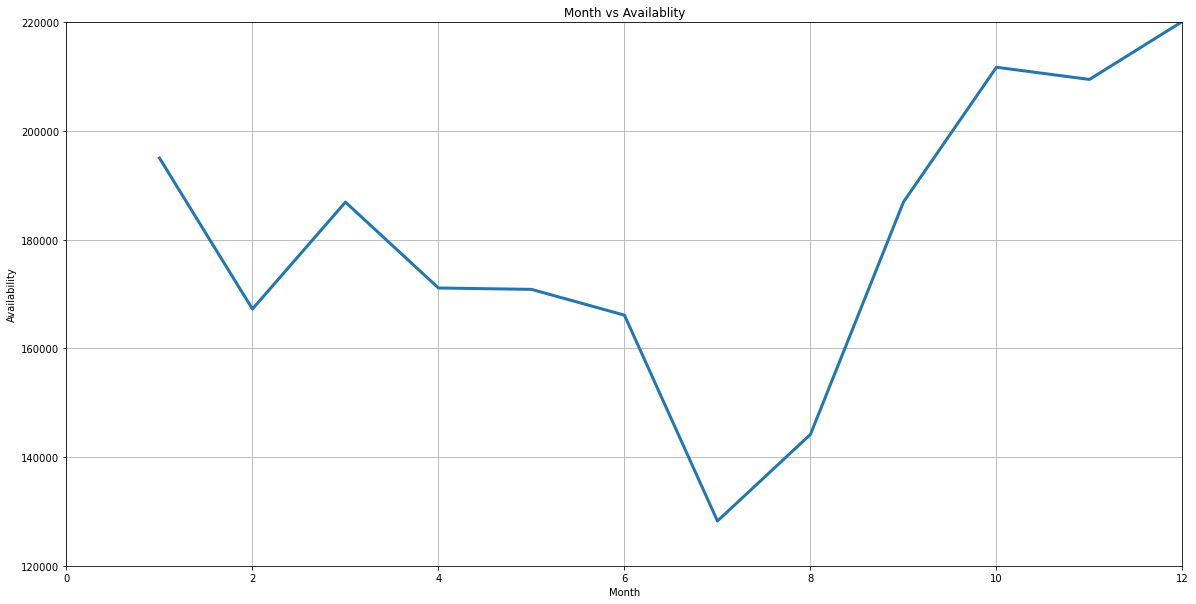

In [465]:
plt.figure(figsize=(20, 10))
x = calendar_df_month_sum['month']
y = calendar_df_month_sum['available']
plt.plot(x,y,linewidth=3.0)
plt.xlabel('Month')
plt.ylabel('Availability')
plt.title('Month vs Availablity')
plt.axis([0, 12, 120000, 220000])
plt.grid(True)
plt.show()

In [466]:
# Groupby by month average
calendar_df_month_sum['average price'] = calendar_df_month_sum['price']/calendar_df_month_sum['available']
calendar_df_month_sum

,month,available,price,minimum_nights,maximum_nights,year,day,average price
0,1,195018,66197352.0,1401175.0,270351381.0,604254480,4781440,339.442267
1,2,167232,62046511.0,1263736.0,244178722.0,545778240,3913840,371.020564
2,3,186902,68586400.0,1393781.0,270360007.0,604254480,4781440,366.964505
3,4,171104,73289100.0,1350152.0,261736592.0,584762400,4482600,428.330723
4,5,170854,78451107.0,1390031.0,270536660.0,604254480,4781440,459.170444
5,6,166107,77735098.0,1344249.0,261755865.0,584762400,4482600,467.982072
6,7,128242,54338656.0,1486112.0,270248915.0,604107252,4781471,423.719655
7,8,144169,27861648.0,1420113.0,269706011.0,603955640,4781440,193.256858
8,9,186914,26642323.0,1347163.0,261266839.0,584473200,4482600,142.537868
9,10,211713,29926168.0,1374227.0,270311509.0,603955640,4781440,141.352529


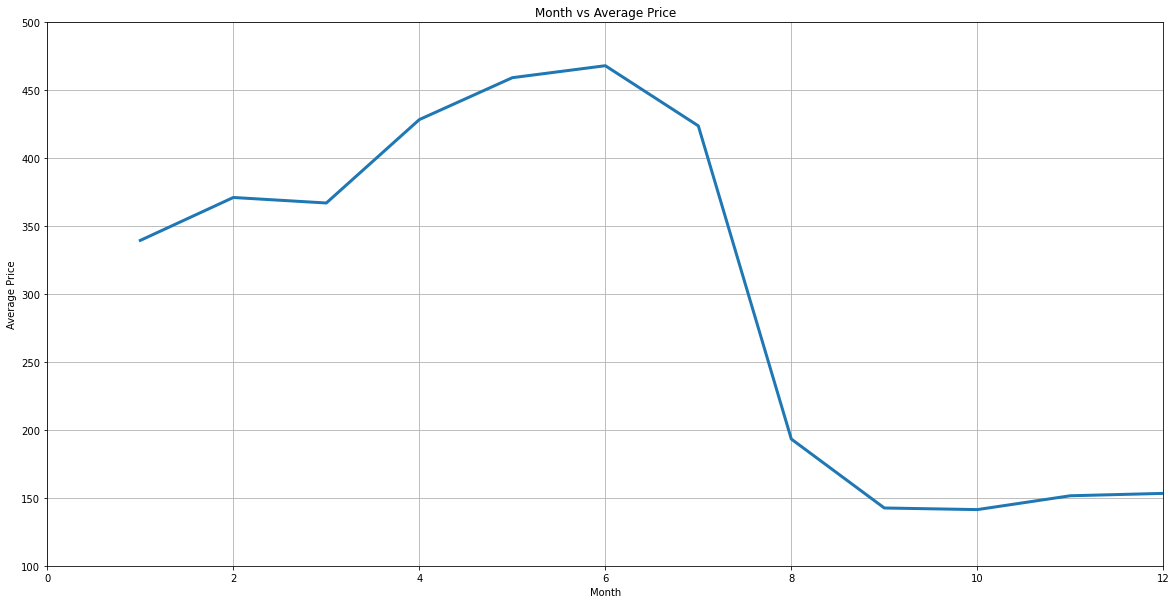

In [467]:
plt.figure(figsize=(20, 10))
x = calendar_df_month_sum['month']
y = calendar_df_month_sum['average price']
plt.plot(x,y,linewidth=3.0)
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Month vs Average Price')
plt.axis([0, 12, 100, 500])
plt.grid(True)
plt.show()


Text(0.5, 0, 'Booking price')

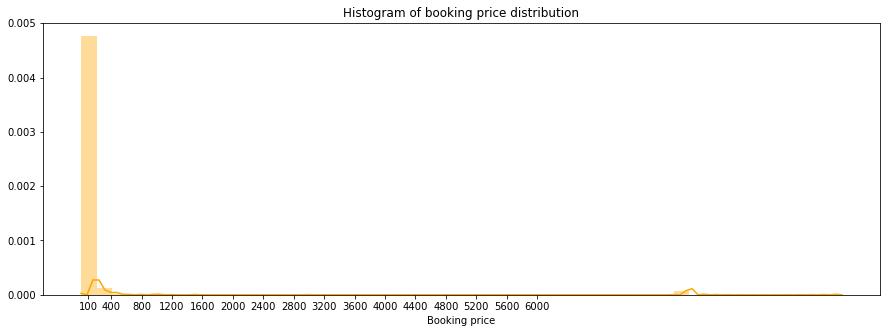

In [468]:
# Histogram of booking price distribution
plt.rcParams["figure.figsize"] = (15,5)
sns.distplot(calendar['price'] , color='orange')
x = [100,400, 800,1200, 1600,2000,2400,2800,3200,3600,4000,4400,4800,5200,5600, 6000]
plt.xticks(x)
plt.title('Histogram of booking price distribution')
plt.xlabel('Booking price')

In [469]:
calendar['price'].describe()

count    3.518602e+06
mean     1.792077e+02
std      9.203691e+02
min      9.000000e+00
25%      3.500000e+01
50%      5.000000e+01
75%      8.000000e+01
max      9.999000e+03
Name: price, dtype: float64

(0.0, 400.0)

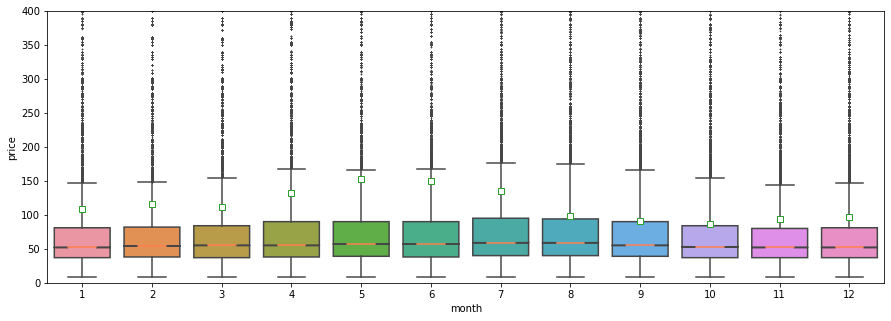

In [470]:
# step 2: EDA and data visualization
# PS: `cond` is stand for condition
avail_listing_cond = calendar['available'] == 1  # select all available listing
avail_listing_df = calendar.loc[avail_listing_cond, :]

# 2_1 Question 1: demonstrate the price distribution of each month, including the 
# average price, max/min price, and other metrics.


ax2_1 = sns.boxplot(data=avail_listing_df, x='month', y='price', fliersize=1, showmeans=True,
                    flierprops={"marker": "x"}, medianprops={"color": "coral"}, notch=True,
                    meanprops={"marker": "s", "markerfacecolor": "white"})
ax2_1.set_xticklabels(ax2_1.get_xticklabels())
ax2_1.set_ylim(0, 400)

Text(0.5, 1.0, 'Distribution of listing from January to December')

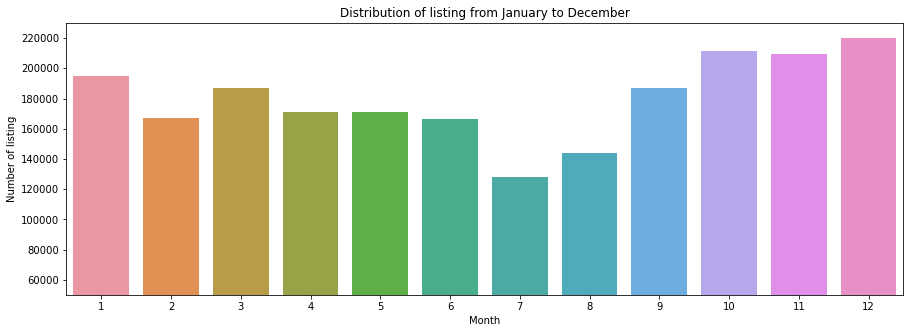

In [471]:
# 2_2 Question 2: We can also display the number of the available listing.
list_mon_grouped = avail_listing_df.groupby('month').count()
ax2_2 = sns.barplot(x=list_mon_grouped.index.values, y=list_mon_grouped['listing_id'].values)
ax2_2.set_ylim(50000, 230000)
ax2_2.set_ylabel("Number of listing")
ax2_2.set_xlabel("Month")
ax2_2.set_title("Distribution of listing from January to December")

(100.0, 120.0)

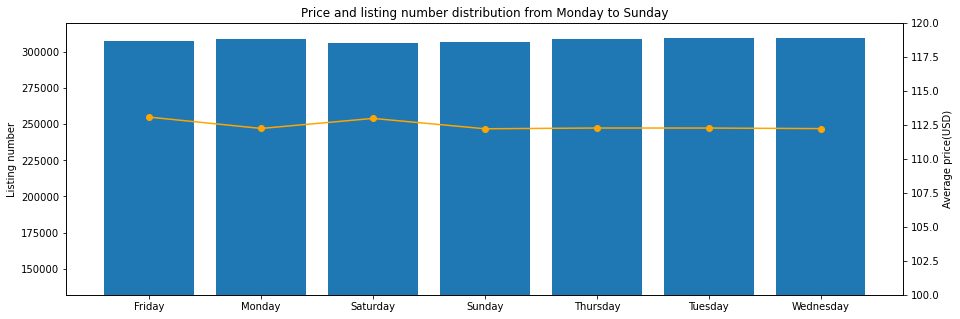

In [534]:
# 2_3 Question 3: Display the average price of listing on each day of the whole week
day_name_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# avail_listing_df.loc[:, 'day_name'] = avail_listing_df.loc[:, 'day_name'].astype(CategoricalDtype(day_name_list))
avail_listing_df.loc[:, 'day_name'].astype(CategoricalDtype(day_name_list), copy=False)
list_wd_avg_grouped = avail_listing_df.groupby('day_name', as_index=False).mean()
list_wd_count_grouped = avail_listing_df.groupby('day_name', as_index=False).count()
list_wd_avg_grouped.sort_values('day_name')
list_wd_count_grouped.sort_values('day_name')

fig, ax2_3_a = plt.subplots()
ax2_3_a.bar(x=list_wd_avg_grouped['day_name'], height=list_wd_count_grouped['price'].values)
ax2_3_a.set_ylim(132000, 320000)
ax2_3_a.set_ylabel("Listing number")
ax2_3_a.set_title("Price and listing number distribution from Monday to Sunday")
ax2_3_b = ax2_3_a.twinx()
ax2_3_b.plot(list_wd_avg_grouped['price'].values, color='orange', marker='o')
ax2_3_b.set_ylabel("Average price(USD)")
ax2_3_b.set_xlabel("Day name")
ax2_3_b.set_ylim(100, 120)

In [473]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10595,https://www.airbnb.com/rooms/10595,20210715154418,2021-07-17,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/f7e19a44-5afe...,37177,https://www.airbnb.com/users/show/37177,...,4.86,4.52,4.69,00000957568,t,6,6,0,0,0.39
1,10990,https://www.airbnb.com/rooms/10990,20210715154418,2021-07-17,Athens Quality Apartments - Deluxe Apartment,Athens Quality Apartments - Deluxe apartment i...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/8645179/c1728...,37177,https://www.airbnb.com/users/show/37177,...,4.92,4.83,4.81,00001070920,t,6,6,0,0,0.70
2,10993,https://www.airbnb.com/rooms/10993,20210715154418,2021-07-17,Athens Quality Apartments - Studio,The Studio is an <br />-excellent located <br ...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/107309527/848...,37177,https://www.airbnb.com/users/show/37177,...,4.97,4.84,4.83,00000957080,t,6,6,0,0,0.91
3,10995,https://www.airbnb.com/rooms/10995,20210715154418,2021-07-17,"AQA-No2 1-bedroom, smart tv, fiber connection,","AQA No2 is 1-bedroom apartment (47m2), on the ...",Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/6a565613-aaa3...,37177,https://www.airbnb.com/users/show/37177,...,4.87,4.77,4.77,00000957422,t,6,6,0,0,0.35
4,27262,https://www.airbnb.com/rooms/27262,20210715154418,2021-07-17,"54m2, 1-br, cable tv, wi-fi, metro",Big 1-bedroom apartment that can accommodate 4...,NaN,https://a0.muscache.com/pictures/8651803/4b82b...,37177,https://www.airbnb.com/users/show/37177,...,5.00,4.69,4.63,00000957579,t,6,6,0,0,0.25


In [474]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9640 entries, 0 to 9639
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            9640 non-null   int64         
 1   listing_url                                   9640 non-null   object        
 2   scrape_id                                     9640 non-null   int64         
 3   last_scraped                                  9640 non-null   datetime64[ns]
 4   name                                          9637 non-null   object        
 5   description                                   9532 non-null   object        
 6   neighborhood_overview                         6720 non-null   object        
 7   picture_url                                   9640 non-null   object        
 8   host_id                                       9640 non-null   int64 

In [475]:
# find missing data
listings_df_miss = pd.DataFrame((listing.isnull().sum())*100/len(listing), columns=['% Missing Values'])
listings_df_miss[listings_df_miss['% Missing Values']>0]

,% Missing Values
name,0.031120
description,1.120332
neighborhood_overview,30.290456
host_name,0.134855
host_since,0.134855
host_location,0.300830
host_about,43.547718
host_response_time,19.408714
host_response_rate,19.408714
host_acceptance_rate,21.431535


In [476]:
# create missing cols list
missing_cols = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']
# check datatype of missing cols
listing[missing_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9640 entries, 0 to 9639
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   review_scores_rating         7463 non-null   float64
 1   review_scores_accuracy       7423 non-null   float64
 2   review_scores_cleanliness    7423 non-null   float64
 3   review_scores_checkin        7422 non-null   float64
 4   review_scores_communication  7423 non-null   float64
 5   review_scores_location       7422 non-null   float64
 6   review_scores_value          7421 non-null   float64
 7   reviews_per_month            7463 non-null   float64
dtypes: float64(8)
memory usage: 602.6 KB


In [477]:
# fill 0 to other missing cols
for col in missing_cols:
    listing[col].fillna(0,inplace=True)
    
# print result
listing[missing_cols].sample(5)

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
2804,4.64,4.88,4.77,4.89,4.99,4.92,4.68,2.25
8673,5.00,5.00,5.00,5.00,5.00,4.83,4.83,1.86
4525,4.83,4.91,4.57,4.97,4.97,5.00,4.66,1.17
4601,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.97
883,4.76,4.86,4.84,4.98,4.97,4.88,4.82,4.26


In [478]:
listings_df_miss = pd.DataFrame((listing.isnull().sum())*100/len(listing), columns=['% Missing Values'])
listings_df_miss[listings_df_miss['% Missing Values']>0]

,% Missing Values
name,0.031120
description,1.120332
neighborhood_overview,30.290456
host_name,0.134855
host_since,0.134855
host_location,0.300830
host_about,43.547718
host_response_time,19.408714
host_response_rate,19.408714
host_acceptance_rate,21.431535


In [479]:
# convert amenities to numerical data
listing['amenities'] = listing['amenities'].apply(lambda x: x[1:-1].split(','))
listing['TV'] = 0
listing['Internet'] = 0
listing['Kitchen'] = 0
listing['Free_parking'] = 0
listing['Washer_dryer'] = 0
listing['Air Conditioning'] = 0
listing['Smoke_detector'] = 0
listing.sample(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,TV,Internet,Kitchen,Free_parking,Washer_dryer,Air Conditioning,Smoke_detector
8462,45650281,https://www.airbnb.com/rooms/45650281,20210715154418,2021-07-17,"R 990 Evzen Villa Residence with Wi-Fi, Baby C...",.<br /><br /><b>The space</b><br />Evzen Villa...,NaN,https://a0.muscache.com/pictures/f1fad548-8423...,194247046,https://www.airbnb.com/users/show/194247046,...,4,0,0.0,0,0,0,0,0,0,0
2668,23250834,https://www.airbnb.com/rooms/23250834,20210715154418,2021-07-16,Art apartment,Corner apartment in the heart of Athens on a b...,NaN,https://a0.muscache.com/pictures/8ca72745-fdad...,172134617,https://www.airbnb.com/users/show/172134617,...,0,0,0.0,0,0,0,0,0,0,0


In [480]:
for i in range(len(listing)):
    if 'TV' in listing.loc[i,'amenities']:
        listing.loc[i,'TV'] = 1
    if 'Internet' in listing.loc[i,'amenities']:
        listing.loc[i,'Internet'] = 1
    if 'Kitchen' in listing.loc[i,'amenities']:
        listing.loc[i,'Kitchen'] = 1 
    if '"Free Parking on Premises"' in listing.loc[i,'amenities']:
        listing.loc[i,'Free_parking'] = 1
    if 'Washer' in listing.loc[i,'amenities']:
        listing.loc[i,'Washer_dryer'] = 1
    if '"Air Conditioning"' in listing.loc[i,'amenities']:
        listing.loc[i,'Air Conditioning'] = 1
    if '"Smoke Detector"' in listing.loc[i,'amenities']:
        listing.loc[i,'Smoke_detector'] = 1
listing.sample(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,TV,Internet,Kitchen,Free_parking,Washer_dryer,Air Conditioning,Smoke_detector
6915,39462693,https://www.airbnb.com/rooms/39462693,20210715154418,2021-07-17,Blue White and Cosy,"Fully refurbished apartment 38m2, 1st floor wi...",NaN,https://a0.muscache.com/pictures/86dd7b2c-8d0f...,303122051,https://www.airbnb.com/users/show/303122051,...,0,0,1.45,0,0,0,0,0,0,0
6945,39584411,https://www.airbnb.com/rooms/39584411,20210715154418,2021-07-17,Athens Center Omonoia Marni Apt No11,Fully equipped and convenient 4th-floor apartm...,A truly boheme neighbourhood in the heart of A...,https://a0.muscache.com/pictures/4f274d87-2b69...,63903716,https://www.airbnb.com/users/show/63903716,...,8,0,0.00,0,0,0,0,0,0,0


In [481]:
#clean price, monthly price and weekly price formats
# fill missing values as 0
listing['price'].fillna('$0', inplace=True)

# remove commas from price
listing['price'] = listing['price'].apply(lambda x: ''.join(x.split(',')))
listing['price'] = listing['price'].apply(lambda x: float(x.split('$')[1]))

listing['price'].sample(5)

231     35.0
1926    30.0
8147    65.0
5181    55.0
1741    70.0
Name: price, dtype: float64

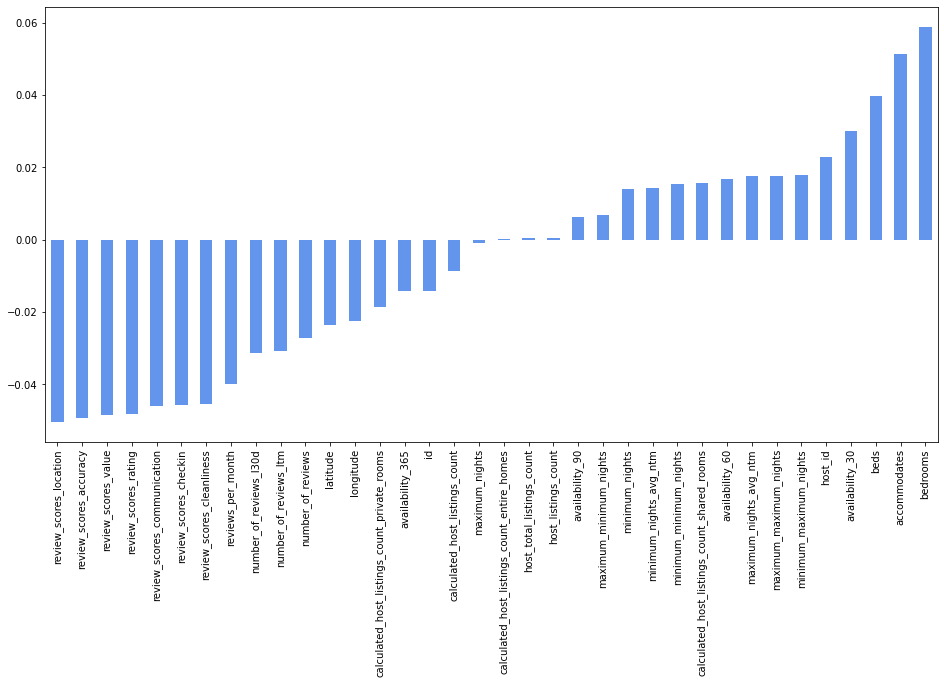

In [482]:
# find correlation to price
plt.figure(figsize=(16,8))
listing.corr()['price'].dropna().sort_values()[:-1].plot(kind='bar', color='cornflowerblue')
plt.show()

In [483]:
import copy
listings_amenities = copy.deepcopy(listing)
listings_amenities.sample(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,TV,Internet,Kitchen,Free_parking,Washer_dryer,Air Conditioning,Smoke_detector
7050,39948183,https://www.airbnb.com/rooms/39948183,20210715154418,2021-07-16,"Sunny cozy apt,Acropolis & Filopappoy balcony ...",Enjoy a fully renovated and cozy apartment in ...,"Just behind the building are super market, caf...",https://a0.muscache.com/pictures/1cda85aa-7b44...,306001530,https://www.airbnb.com/users/show/306001530,...,0,0,6.14,0,0,0,0,0,0,0
4138,29174512,https://www.airbnb.com/rooms/29174512,20210715154418,2021-07-17,"The heart of Koukaki, next to Acropolis museum","Offering free WiFi and city views, the heart o...",Koukaki & Makrigianni: Once the working-class ...,https://a0.muscache.com/pictures/b43158a9-9f6f...,217699045,https://www.airbnb.com/users/show/217699045,...,0,0,0.08,0,0,0,0,0,0,0


In [484]:
listings_amenities.drop(['id','reviews_per_month','host_id','longitude','latitude',\
                  'reviews_per_month','number_of_reviews','availability_90',\
                  'calculated_host_listings_count','availability_60',\
                  'availability_30','review_scores_value','review_scores_communication',\
                  'review_scores_checkin','review_scores_accuracy','review_scores_rating',\
                  'review_scores_cleanliness','availability_365','review_scores_location',\
                  'maximum_nights','minimum_nights','host_listings_count'],axis=1,inplace=True)

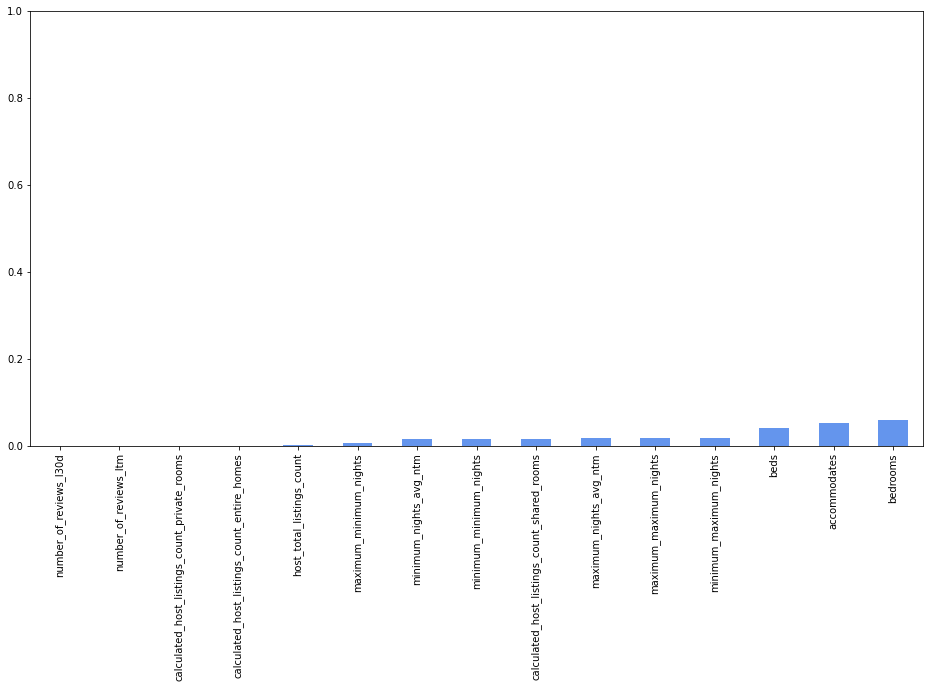

In [485]:
# find correlation to price
plt.figure(figsize=(16,8))

listings_amenities.corr()['price'].dropna().sort_values()[:-1].plot(kind='bar', color='cornflowerblue')
plt.xticks(rotation=90)
plt.ylim(0,1)
plt.show()

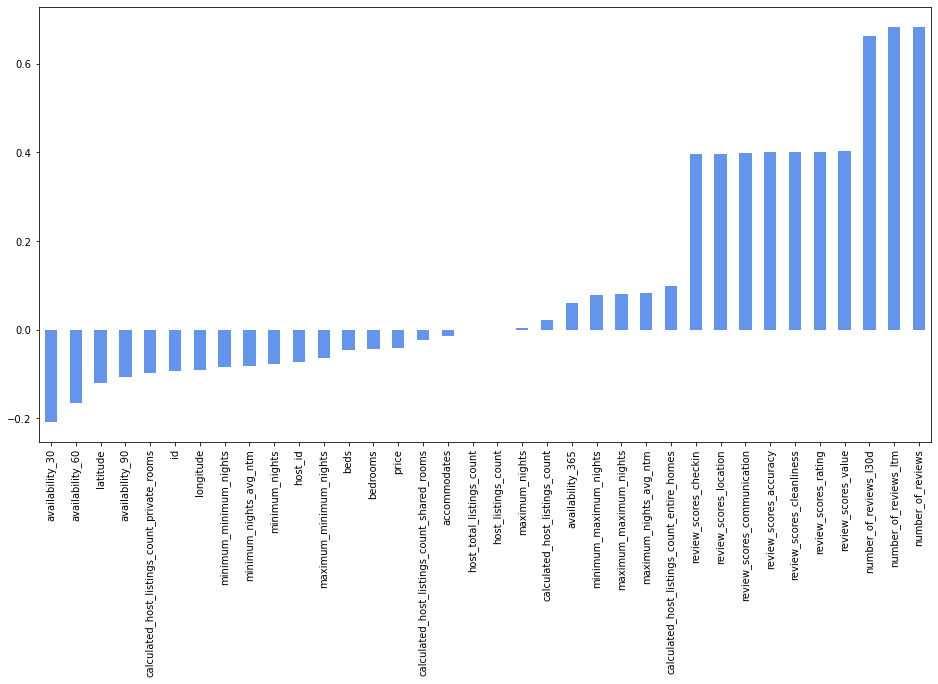

In [486]:
# Run the correlation to reviews per month with the remaining features
plt.figure(figsize=(16,8))
listing.corr()['reviews_per_month'].dropna().sort_values()[:-1].plot(kind='bar', color='cornflowerblue')
plt.show()

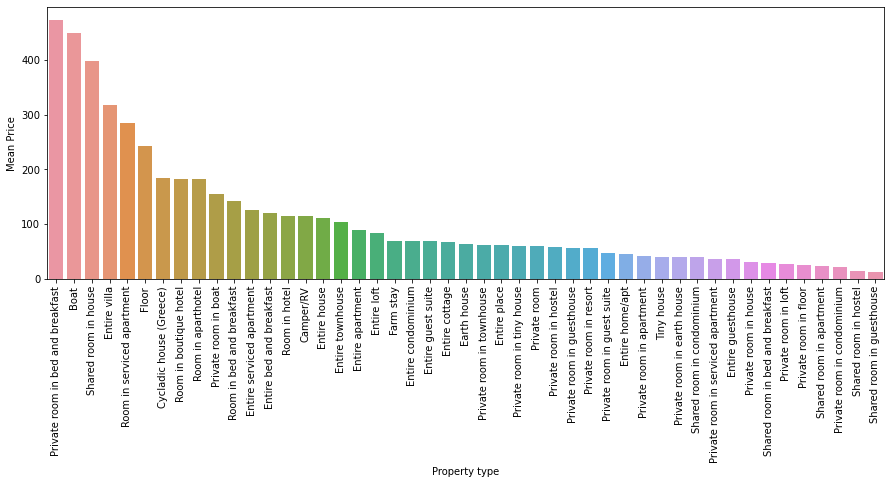

In [528]:
x = pd.DataFrame(listing.groupby('property_type')['price'].mean().sort_values(ascending=False))
x = x.reset_index()

sns.barplot(x = 'property_type',
            y = 'price',
            data = x)
plt.xticks(rotation=90)
plt.xlabel('Property type')
plt.ylabel('Mean Price')
plt.show()

In [487]:
# groupby neighbourhood
listings_neigh = listing.groupby(['neighbourhood_cleansed']).mean()
listings_neigh.reset_index(inplace=True)
listings_neigh.sort_values(['price'],inplace=True,ascending=False)

In [488]:
listings_df_neigh.sample(2)

,neighbourhood_cleansed,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,...,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,TV,Internet,Kitchen,Free_parking,Washer_dryer,Air Conditioning,Smoke_detector
24,ΚΥΨΕΛΗ,3.083246e+07,2.021072e+13,1.203633e+08,44.18315,44.18315,NaN,37.999270,23.736822,3.157509,...,36.230769,0.007326,0.532271,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,ΓΟΥΒΑ,2.853419e+07,2.021072e+13,1.358201e+08,11.58000,11.58000,NaN,37.960056,23.741875,3.940000,...,0.160000,0.000000,0.761800,0.0,0.0,0.0,0.0,0.0,0.0,0.0


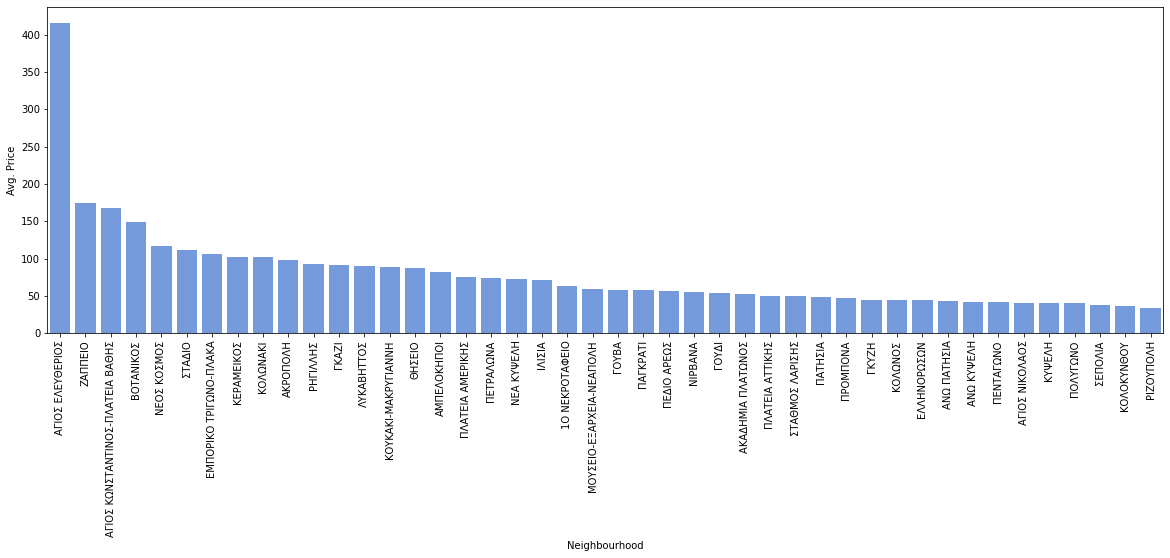

In [489]:
plt.figure(figsize=(20,6))
sns.barplot(x='neighbourhood_cleansed',y='price',data=listings_neigh,color='cornflowerblue')
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Avg. Price')
plt.show()

In [490]:
# append average price by neighborhood to the original listings dataframe
listing['neigh_avg_price'] = listing['neighbourhood_cleansed'].apply(lambda x: float(listings_df_neigh[listings_df_neigh['neighbourhood_cleansed']== x]['price'].values))

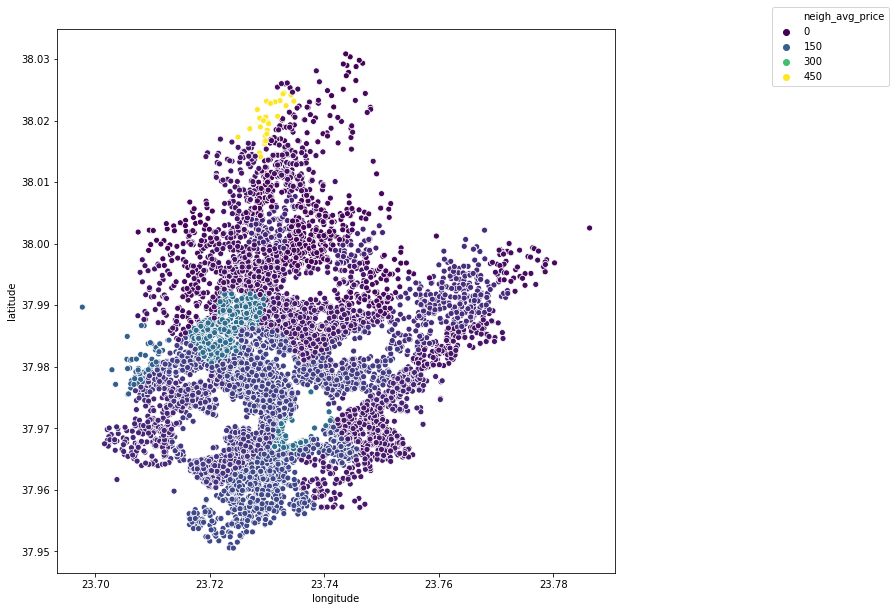

In [491]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude',y='latitude',data=listing,hue='neigh_avg_price',palette='viridis')
plt.legend(loc='upper right',bbox_to_anchor=(1.5, 1.05))
plt.show()

In [492]:
Stat = listing[["host_response_rate", "host_acceptance_rate", "host_is_superhost",
               "host_listings_count", "property_type","room_type", "accommodates", "bathrooms", "bedrooms", 
               "beds", "price", "number_of_reviews", "review_scores_rating", "reviews_per_month"]]
Stat.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,reviews_per_month
0,100%,97%,t,6.0,Entire apartment,Entire home/apt,8,NaN,3.0,5.0,100.0,29,4.79,0.39
1,100%,97%,t,6.0,Entire apartment,Entire home/apt,4,NaN,1.0,1.0,59.0,48,4.85,0.70
2,100%,97%,t,6.0,Entire apartment,Entire home/apt,2,NaN,NaN,1.0,45.0,64,4.83,0.91
3,100%,97%,t,6.0,Entire apartment,Entire home/apt,4,NaN,1.0,2.0,60.0,24,4.79,0.35
4,100%,97%,t,6.0,Entire apartment,Entire home/apt,4,NaN,1.0,1.0,69.0,17,4.76,0.25


In [493]:
# % of NaN values
(len(Stat)-Stat.count())/len(Stat)*100

host_response_rate       19.408714
host_acceptance_rate     21.431535
host_is_superhost         0.134855
host_listings_count       0.134855
property_type             0.000000
room_type                 0.000000
accommodates              0.000000
bathrooms               100.000000
bedrooms                  8.443983
beds                      0.684647
price                     0.000000
number_of_reviews         0.000000
review_scores_rating      0.000000
reviews_per_month         0.000000
dtype: float64

In [494]:
Stat2=Stat.fillna(0)

In [495]:
Stat2['host_response_rate'] = Stat2['host_response_rate'].astype(str)
Stat2['host_acceptance_rate'] = Stat2['host_acceptance_rate'].astype(str)
Stat2['price'] = Stat2['price'].astype(str)

In [496]:
# clean data
pd.options.mode.chained_assignment = None  # default='warn'
Stat2['host_acceptance_rate'] = Stat2['host_acceptance_rate'].str.replace("%", "").astype("float")
Stat2['price'] = Stat2['price'].str.replace("[$, ]", "").astype("float")
Stat2['host_response_rate'] = Stat2['host_response_rate'].str.replace("%", "").astype("float")

In [497]:
Stat2['superhost']=np.where(Stat2['host_is_superhost']=='t',1,0)
del Stat2['host_is_superhost']

In [498]:
# select non-numeric variables and create dummies
non_num_vars = Stat2.select_dtypes(include=['object']).columns
Stat2[non_num_vars].head()

,property_type,room_type
0,Entire apartment,Entire home/apt
1,Entire apartment,Entire home/apt
2,Entire apartment,Entire home/apt
3,Entire apartment,Entire home/apt
4,Entire apartment,Entire home/apt


In [499]:
dummy_vars = pd.get_dummies(Stat2[non_num_vars])
dummy_vars.head()

,property_type_Boat,property_type_Camper/RV,property_type_Cycladic house (Greece),property_type_Earth house,property_type_Entire apartment,property_type_Entire bed and breakfast,property_type_Entire condominium,property_type_Entire cottage,property_type_Entire guest suite,property_type_Entire guesthouse,...,property_type_Shared room in bed and breakfast,property_type_Shared room in condominium,property_type_Shared room in guesthouse,property_type_Shared room in hostel,property_type_Shared room in house,property_type_Tiny house,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [500]:
# drop non-numeric variables from Stat2 and add the dummies
Stat3=Stat2.drop(non_num_vars,axis=1)
Stat3 = pd.merge(Stat3,dummy_vars, left_index=True, right_index=True)
Stat3.head()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,...,property_type_Shared room in bed and breakfast,property_type_Shared room in condominium,property_type_Shared room in guesthouse,property_type_Shared room in hostel,property_type_Shared room in house,property_type_Tiny house,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,100.0,97.0,6.0,8,0.0,3.0,5.0,100.0,29,4.79,...,0,0,0,0,0,0,1,0,0,0
1,100.0,97.0,6.0,4,0.0,1.0,1.0,59.0,48,4.85,...,0,0,0,0,0,0,1,0,0,0
2,100.0,97.0,6.0,2,0.0,0.0,1.0,45.0,64,4.83,...,0,0,0,0,0,0,1,0,0,0
3,100.0,97.0,6.0,4,0.0,1.0,2.0,60.0,24,4.79,...,0,0,0,0,0,0,1,0,0,0
4,100.0,97.0,6.0,4,0.0,1.0,1.0,69.0,17,4.76,...,0,0,0,0,0,0,1,0,0,0


Text(0.5, 1.0, 'No. of bedrooms vs price')

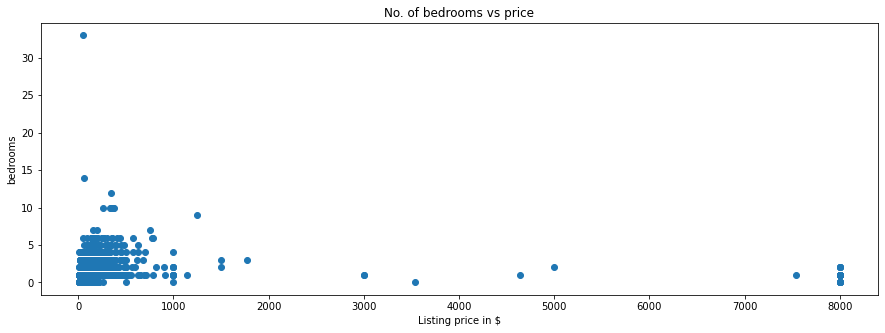

In [501]:
plt.scatter(Stat3['price'],Stat3['bedrooms'])
plt.ylabel('bedrooms')
plt.xlabel('Listing price in $')
plt.title('No. of bedrooms vs price')

Text(0.5, 1.0, 'No. of reviews vs price')

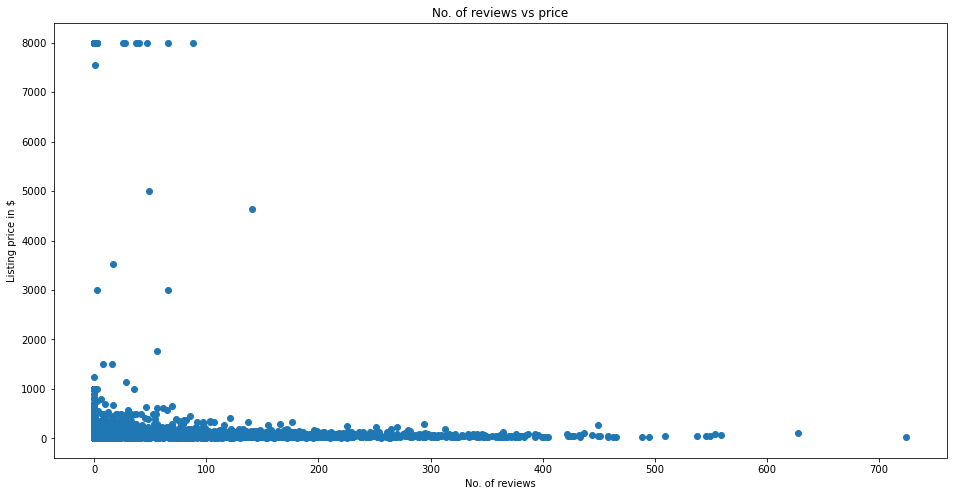

In [502]:
plt.figure(figsize=(16,8))
plt.scatter(Stat3['number_of_reviews'],Stat3['price'])
plt.ylabel('Listing price in $')
plt.xlabel('No. of reviews')
plt.title('No. of reviews vs price')

Text(0.5, 0, 'Listing price in $')

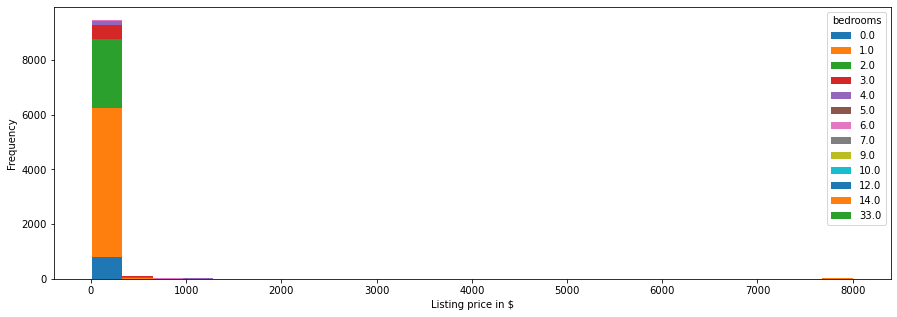

In [503]:
Stat3.pivot(columns = 'bedrooms',values = 'price').plot.hist(stacked = True,bins=25)
plt.xlabel('Listing price in $')

Text(0.5, 0, 'Listing price in $')

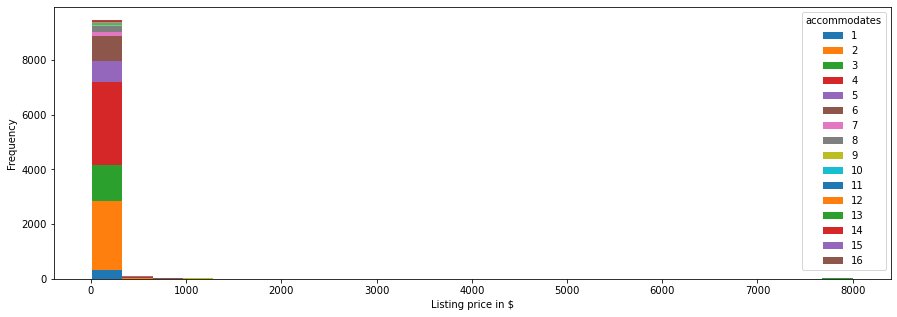

In [504]:
Stat3.pivot(columns = 'accommodates',values = 'price').plot.hist(stacked = True,bins=25)
plt.xlabel('Listing price in $')

In [505]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,10595,271535,2011-05-20,189305,Pamela,"The apartment was wonderful, fully equiped, be..."
1,10595,1994237,2012-08-15,289831,Andrey,Emmanouil was an excellent host. He provided u...
2,10595,4678609,2013-05-20,2635427,Ahmet,"Manos is a very good host, he is kind and help..."
3,10595,12502994,2014-05-04,2422327,Hema,"Our stay in Emmanouil home was comfortable, qu..."
4,10595,19482948,2014-09-13,6737784,Mariana,Fantastic accommodation very well located to v...


In [506]:
#fill Na value with "None" on Comments columns
reviews['comments'].fillna("None", inplace=True)


In [507]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366678 entries, 0 to 366677
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   listing_id     366678 non-null  int64         
 1   id             366678 non-null  int64         
 2   date           366678 non-null  datetime64[ns]
 3   reviewer_id    366678 non-null  int64         
 4   reviewer_name  366678 non-null  object        
 5   comments       366678 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 16.8+ MB


In [508]:
#Generate "Year"、“Month"、”Day“ columns according to the date column 
reviews['Year'] = reviews['date'].dt.year
reviews['Month'] = reviews['date'].dt.month
reviews['Day'] = reviews['date'].dt.day
reviews['day_name'] = reviews['date'].dt.day_name()

In [509]:
#Join the listing 
listing_join_list = ['id', 'price', 'neighbourhood_group_cleansed', 'property_type', 'room_type',
                     'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                     'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                     'review_scores_value']
review_info_df = pd.DataFrame(reviews.groupby('listing_id').count()['comments'].sort_values(ascending=False))
review_info_df = pd.merge(review_info_df, listing[listing_join_list], left_index=True, right_on='id')
review_info_df.rename({'comments': 'comment counts'}, axis=1, inplace=True)
print(review_info_df.head(10))

      comment counts        id  price  neighbourhood_group_cleansed  \
132              724   1177492   31.0                           NaN   
256              628   3431705  107.0                           NaN   
159              559   1484797   66.0                           NaN   
1007             554  13553080   85.0                           NaN   
347              549   5025556   58.0                           NaN   
1168             546  14583913   48.0                           NaN   
196              538   2305770   50.0                           NaN   
1359             509  16278854   48.0                           NaN   
204              495   2579525   34.0                           NaN   
695              489  10400201   30.0                           NaN   

         property_type        room_type  review_scores_rating  \
132        Earth house  Entire home/apt                  4.72   
256   Entire apartment  Entire home/apt                  4.84   
159   Entire apartment 

In [511]:
#Some numeric facts on the reviews.csv dataset
# Question 1: Numeric factors on reviews_df 
# a: How many reviewers posted their comments? 
print("There are {} reviewers leave their comments.".format(reviews['reviewer_id'].unique().shape[0]))
# b: How many listings were commented? 
print("There are {} listings were commented.".format(reviews['listing_id'].unique().shape[0]))
# c: The TOP 10 commented listings 
print("TOP 10 commented listing:\n")
print(review_info_df['comment counts'].head(10))

There are 320843 reviewers leave their comments.
There are 7463 listings were commented.
TOP 10 commented listing:

132     724
256     628
159     559
1007    554
347     549
1168    546
196     538
1359    509
204     495
695     489
Name: comment counts, dtype: int64


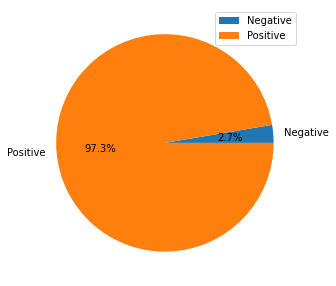

In [535]:
 #Reviews analysis
# Definition: For reviews score in detail, an 4+ score will be defined as a positive rating and a 
# score under 4 will be seen as a negative rating. 
# In terms of the score review rating, a score under 80 will be seen as a negative rating.

#  Numeric facts
#1: The proportion of listing who gets the negative rating 
neg_rating = review_info_df['review_scores_rating'][review_info_df['review_scores_rating'] < 4]
plt.pie([neg_rating.count(), review_info_df.shape[0] - neg_rating.count()], labels=['Negative', 'Positive'],
        autopct='%1.1f%%')
plt.legend()

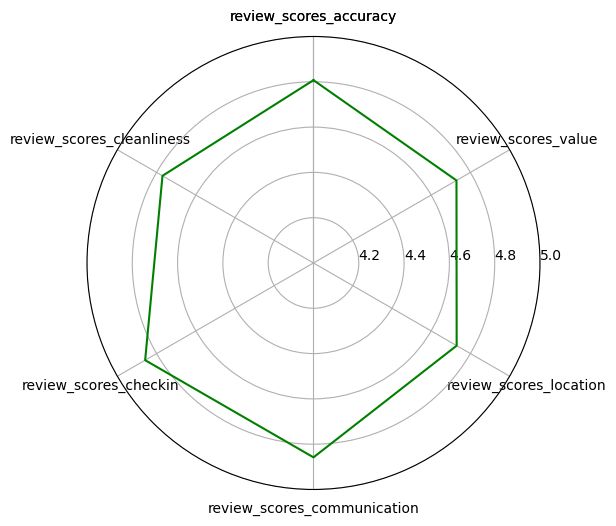

In [519]:
#radar map of review rating in details 
detail_score_rating_l = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                         'review_scores_communication', 'review_scores_location', 'review_scores_value']
mean_score = review_info_df[detail_score_rating_l].mean(axis=0, skipna=True)

data_length = mean_score.shape[0]
angles = np.linspace(0, 2*np.pi, data_length, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))
labels = np.concatenate((mean_score.index.values, [mean_score.index.values[0]]))
scores = np.concatenate((mean_score.values, [mean_score.values[0]]))
fig = plt.figure(figsize=(8, 6), dpi=100)
ax_2_2_a_2 = plt.subplot(111, polar=True)
ax_2_2_a_2.plot(angles, scores, color='g')
ax_2_2_a_2.set_thetagrids(angles*180/np.pi, labels)
ax_2_2_a_2.set_theta_zero_location('N')
ax_2_2_a_2.set_rlim(4, 5)  # set the r limit from 4 to 5
ax_2_2_a_2.set_rlabel_position(270)